# Задача классификации. Практика

В этом домашнем задании вы будете решать задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_first_step_in_nlp/main/datasets/telecom_churn.csv")
df.head()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\NOVASTORE\anaconda3\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.5.2
          pip: 24.0
   setuptools: 75.2.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.8.4
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 20
         prefix: libopenblas
       filepath: C:\Users\NOVASTORE\AppData\Roaming\Python\Python312\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 20
         prefix: vcomp
       filepath: C:\Users\NOVASTORE\anaconda3\Lib\site-packages\skl

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделаем первичную обработку данных:

1) Выбросите колонку State

**Вопрос:** сколько столбцов осталось в матрице df?

In [2]:
df.drop(['State'], axis=1).head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделаем простую кодировку признаков:

2) Колонку International plan закодируем следующим образом: "Yes" замените на 1, а "No" на 0.

In [3]:
df['International plan'] = df['International plan'].map({'Yes' : 1, 'No' : 0})

Аналогичным образом закодируйте столбец Voice mail plan.

In [4]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

3) Переведем целевую переменную (Churn) в числа: True в 1, а False в 0.

In [5]:
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [6]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [7]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

Проверьте баланс классов целевой переменной. Является ли выборка сбалансированной?

**Вопрос:** сколько объектов относятся к классу 1?

In [8]:
class_counts = y.value_counts()

print(f"Класс 0: {class_counts[0]}")
print(f"Класс 1: {class_counts[1]}")
print(f"Сбалансированность: {'Да' if abs(class_counts[0] - class_counts[1]) / len(y) < 0.1 else 'Нет'}")

Класс 0: 2850
Класс 1: 483
Сбалансированность: Нет


Разбейте данные на тренировочную и тестовую части, размер тестовой части - 30%.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

non_numeric_cols = X.select_dtypes(include=['object']).columns
print(f"Текстовые столбцы: {non_numeric_cols}")

if len(non_numeric_cols) > 0:
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)
print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")

Текстовые столбцы: Index(['State'], dtype='object')
      Account length  Area code  International plan  Voice mail plan  \
2016              80        510                   0                0   
1362              63        510                   0                0   
2670             116        510                   0                1   
2210              71        415                   0                0   
1846             120        510                   0                1   
...              ...        ...                 ...              ...   
1095             106        510                   0                0   
1130             122        415                   0                0   
1294              66        408                   0                0   
860              169        415                   0                0   
3174              36        408                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
2016            

Для линейных моделей очень важно масштабирование признаков. Поэтому
отмасштабируйте признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

Для восстановления DataFrame-ов из преобразованных объектов используйте код с занятия.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Масштабированные тренировочные данные:")
print(X_train_scaled.head())

print("\nМасштабированные тестовые данные:")
print(X_test_scaled.head())

Масштабированные тренировочные данные:
      Account length  Area code  International plan  Voice mail plan  \
2016       -0.511937   1.740454           -0.324289        -0.612192   
1362       -0.939002   1.740454           -0.324289        -0.612192   
2670        0.392435   1.740454           -0.324289         1.633475   
2210       -0.738030  -0.515843           -0.324289        -0.612192   
1846        0.492921   1.740454           -0.324289         1.633475   

      Number vmail messages  Total day minutes  Total day calls  \
2016              -0.585483           0.410716         0.873749   
1362              -0.585483          -0.864713         1.074874   
2670               0.289180           0.752053         0.370935   
2210              -0.585483           1.814605         0.471498   
1846               2.548723          -0.038896         0.823467   

      Total day charge  Total eve minutes  Total eve calls  ...  State_SD  \
2016          0.410877           1.167102       

Обучите на тренировочных данных с параметрами по умолчанию:

1) Логистическую регрессию

2) Метод ближайших соседей

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

logreg = LogisticRegression() 
logreg.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

print("Коэффициенты логистической регрессии:")
print(logreg.coef_)

Параметры KNN: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Коэффициенты логистической регрессии:
[[ 0.04029924  0.09158507  0.68161712 -0.6899064   0.27858296  0.32121458
   0.00726091  0.32190687  0.19377297  0.02128695  0.19089397  0.08267318
   0.00397136  0.07888602  0.13270669 -0.22893276  0.13981979  0.6731848
  -0.08626001  0.1164831  -0.04795892  0.09126572 -0.03808869  0.05029963
  -0.01547505 -0.01854982  0.02121478  0.06965129 -0.035409   -0.10696224
   0.02413839 -0.09221128  0.06197911  0.07922366  0.07501357 -0.00367827
   0.04247016  0.11204563  0.11648443  0.1202173   0.12781054 -0.01760113
   0.09223562  0.20243674  0.07509067 -0.14816928  0.05538939  0.06177566
   0.14968477 -0.00412758  0.11990075  0.13248981  0.04750726  0.0339693
   0.10791389  0.10864536 -0.00321175  0.15003581 -0.00928785 -0.01271638
   0.17705493  0.03383721 -0.05642231 -0.15052634  0.1231827

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте.

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности.

**Вопрос:** чему равен ROC-AUC логистической регрессии, округленный до десятых?

In [12]:
from sklearn.metrics import roc_auc_score

# Предсказание вероятностей классов на тестовых данных
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1

# Вычисление метрики ROC-AUC для логистической регрессии
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

# Вычисление метрики ROC-AUC для метода ближайших соседей
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Вывод результатов
print(f"ROC-AUC для логистической регрессии: {roc_auc_logreg:.1f}")
print(f"ROC-AUC для метода ближайших соседей: {roc_auc_knn:.1f}")

ROC-AUC для логистической регрессии: 0.8
ROC-AUC для метода ближайших соседей: 0.7


## Бонус. Подбор гиперпараметров модели.

У моделей машинного обучения есть гиперпараметры - это величины, которые задает человек до начала обучения моделей. Подбор гиперпараметров может значительно влиять на качество моделей.

Про эту тему можно посмотреть [на Stepik](https://stepik.org/lesson/806516/step/4?unit=809692).

Теперь ваша цель - максимально улучшить модели. Для этого:

1) у логистической регрессии подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у метода ближайших соседей подберите число соседей n_neighbors (ищите значение гиперпараметра в диапазоне от 1 до 20 с шагом 1).

Подбор гиперпараметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 1) Подбор гиперпараметра для логистической регрессии
logreg_param_grid = {'C': np.linspace(0.1, 10, 20)}  # Гиперпараметр C для логистической регрессии
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)

# Лучший гиперпараметр для логистической регрессии
best_logreg_C = logreg_grid_search.best_params_['C']
print(f"Лучший параметр C для логистической регрессии: {best_logreg_C}")

# Обучаем логистическую регрессию с найденным гиперпараметром
logreg_best = LogisticRegression(C=best_logreg_C)
logreg_best.fit(X_train_scaled, y_train)

# Предсказания и ROC-AUC для логистической регрессии
y_pred_proba_logreg_best = logreg_best.predict_proba(X_test_scaled)[:, 1]
roc_auc_logreg_best = roc_auc_score(y_test, y_pred_proba_logreg_best)
print(f"ROC-AUC для логистической регрессии с лучшим гиперпараметром C: {roc_auc_logreg_best:.2f}")

# 2) Подбор гиперпараметра для метода ближайших соседей
knn_param_grid = {'n_neighbors': range(1, 21)}  # Гиперпараметр n_neighbors для KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

# Лучший гиперпараметр для KNN
best_knn_neighbors = knn_grid_search.best_params_['n_neighbors']
print(f"Лучшее количество соседей для KNN: {best_knn_neighbors}")

# Обучаем KNN с найденным гиперпараметром
knn_best = KNeighborsClassifier(n_neighbors=best_knn_neighbors)
knn_best.fit(X_train_scaled, y_train)

# Предсказания и ROC-AUC для KNN
y_pred_proba_knn_best = knn_best.predict_proba(X_test_scaled)[:, 1]
roc_auc_knn_best = roc_auc_score(y_test, y_pred_proba_knn_best)
print(f"ROC-AUC для KNN с лучшим гиперпараметром n_neighbors: {roc_auc_knn_best:.2f}")

# Сравнение результатов
if roc_auc_logreg_best > roc_auc_knn_best:
    print("Логистическая регрессия показала лучший результат по ROC-AUC.")
else:
    print("Метод ближайших соседей показал лучший результат по ROC-AUC.")

Лучший параметр C для логистической регрессии: 0.1
ROC-AUC для логистической регрессии с лучшим гиперпараметром C: 0.82
Лучшее количество соседей для KNN: 8
ROC-AUC для KNN с лучшим гиперпараметром n_neighbors: 0.69
Логистическая регрессия показала лучший результат по ROC-AUC.


Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

Нарисуйте roc-кривую для наилучшей модели.

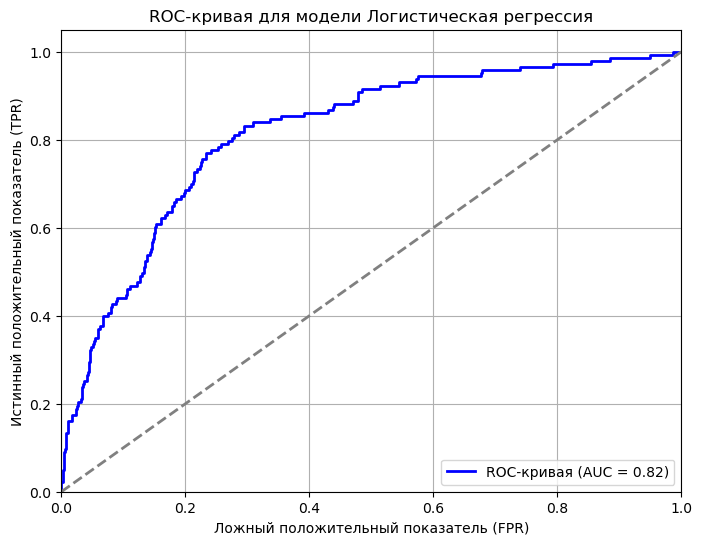

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Выбор модели с наилучшей метрикой ROC-AUC
if roc_auc_logreg_best > roc_auc_knn_best:
    best_model = logreg_best
    y_pred_proba_best = y_pred_proba_logreg_best
    model_name = 'Логистическая регрессия'
else:
    best_model = knn_best
    y_pred_proba_best = y_pred_proba_knn_best
    model_name = 'KNN'

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)

# Вычисление площади под кривой (AUC)
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Линия случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложный положительный показатель (FPR)')
plt.ylabel('Истинный положительный показатель (TPR)')
plt.title(f'ROC-кривая для модели {model_name}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Сравните между собой две лучшие модели:

1) насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc на тестовых данных)

2) постройте гистограмму важности признаков для логистической регрессии. Какие три признака наиболее важны для модели?

Разность в ROC-AUC между логистической регрессией и KNN на тестовых данных: 0.130


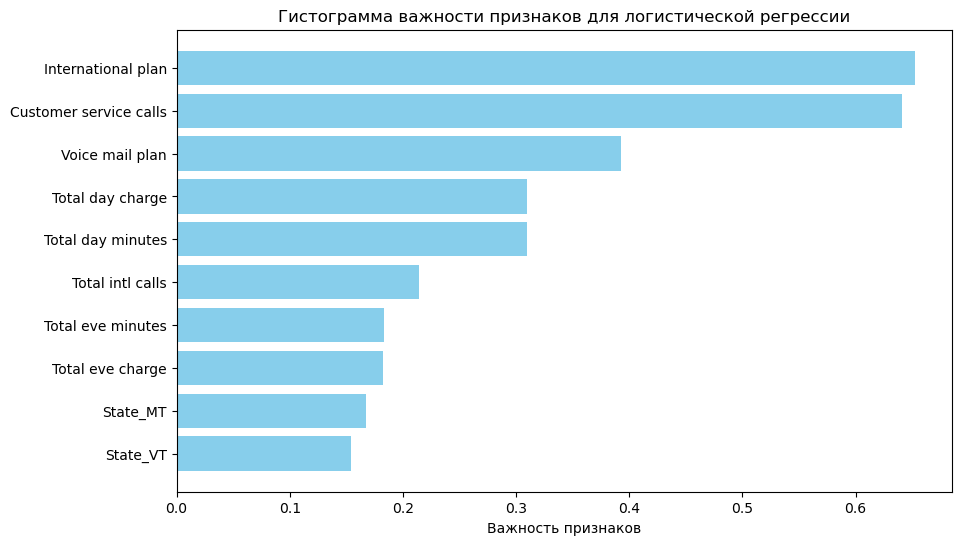

Три наиболее важных признака для модели логистической регрессии:
                   Feature  Importance
2       International plan    0.652195
17  Customer service calls    0.641291
3          Voice mail plan    0.392462


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Сравнение качества предсказания на тестовых данных
roc_auc_diff = abs(roc_auc_logreg_best - roc_auc_knn_best)
print(f"Разность в ROC-AUC между логистической регрессией и KNN на тестовых данных: {roc_auc_diff:.3f}")

# 2) Построение гистограммы важности признаков для логистической регрессии
# Важность признаков для логистической регрессии - это абсолютные значения коэффициентов
importance_logreg = np.abs(logreg_best.coef_[0])

# Получаем имена признаков
feature_names = X_train_scaled.columns

# Создаем DataFrame для удобства сортировки
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_logreg
})

# Сортируем по убыванию важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Важность признаков')
plt.title('Гистограмма важности признаков для логистической регрессии')
plt.gca().invert_yaxis()  # Для отображения наиболее важных признаков сверху
plt.show()

# Три наиболее важных признака
top_3_features = importance_df.head(3)
print("Три наиболее важных признака для модели логистической регрессии:")
print(top_3_features[['Feature', 'Importance']])


Так можно строить гистограмму

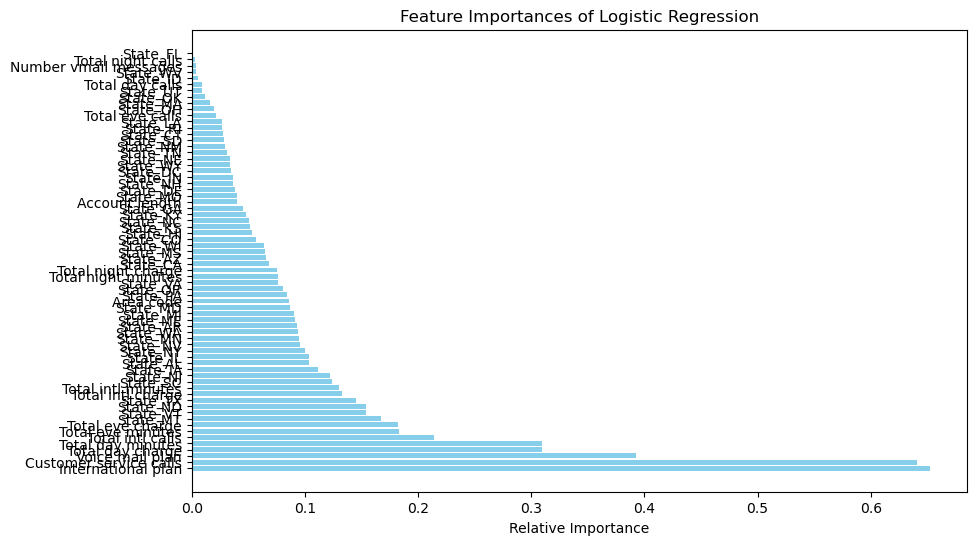

Три наиболее важных признака для модели логистической регрессии:
State_FL
Total night calls
Number vmail messages


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Получаем признаки и их важность из модели логистической регрессии
features = X_train_scaled.columns
importances = np.abs(logreg_best.coef_[0])  # Используем модель с наилучшим гиперпараметром
indices = np.argsort(importances)  # Сортируем признаки по их важности

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.title('Feature Importances of Logistic Regression')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Чтобы наиболее важные признаки были сверху
plt.show()

# Три наиболее важных признака
top_3_features = features[indices[:3]]
print("Три наиболее важных признака для модели логистической регрессии:")
for feature in top_3_features:
    print(feature)

Сделайте выводы:

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?